# IMDB Movie Reviews Sentiment Analysis using Jointly Learned Embeddings

#### Preprocessed IMDB data that comes packaged with Keras is used here.

In [1]:
# Imports required packages

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import matplotlib.pyplot as plt

In [2]:
max_features = 10000     # count of most common words
embedding_dim = 100      # dimension of embedding
max_input_length = 500   # number of review words to into consideration

In [3]:
# Loads train and test data from preprocessed IMDB database that comes with Keras

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [4]:
print("Train samples count:", x_train.shape[0],
      "\nTest samples count:", x_test.shape[0])

Train samples count: 25000 
Test samples count: 25000


In [5]:
# Pads reviews to be of same size

x_train = pad_sequences(x_train, maxlen = max_input_length)
x_test = pad_sequences(x_test, maxlen = max_input_length)

In [6]:
# Creates model

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length = max_input_length))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [7]:
# Shows the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 50000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1600032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = .2)

Epoch 1/10
625/625 [==============================] - 35s 54ms/step - loss: 0.6087 - acc: 0.6090 - val_loss: 0.3345 - val_acc: 0.8612
Epoch 2/10
625/625 [==============================] - 36s 58ms/step - loss: 0.1435 - acc: 0.9463 - val_loss: 0.3867 - val_acc: 0.8558
Epoch 3/10
625/625 [==============================] - 35s 56ms/step - loss: 0.0203 - acc: 0.9953 - val_loss: 0.6084 - val_acc: 0.8504
Epoch 4/10
625/625 [==============================] - 36s 57ms/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.9210 - val_acc: 0.8412
Epoch 5/10
625/625 [==============================] - 37s 58ms/step - loss: 7.7602e-04 - acc: 0.9998 - val_loss: 1.1116 - val_acc: 0.8350
Epoch 6/10
625/625 [==============================] - 37s 60ms/step - loss: 6.9336e-05 - acc: 1.0000 - val_loss: 1.2923 - val_acc: 0.8248
Epoch 7/10
625/625 [==============================] - 40s 63ms/step - loss: 4.8027e-07 - acc: 1.0000 - val_loss: 1.4125 - val_acc: 0.8348
Epoch 8/10
625/625 [==============================

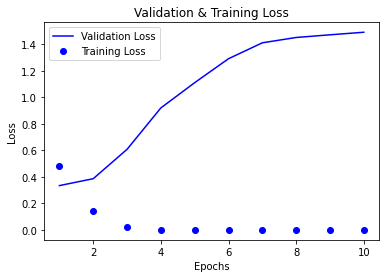

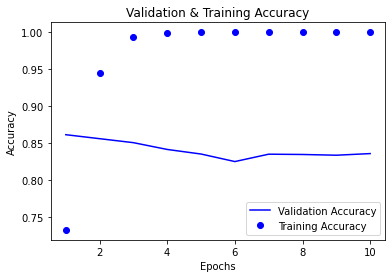

In [9]:
# Evaluates training and validation performance

history_dict = history.history

epoch_range = range(1, len(history_dict["acc"]) + 1)

train_losses = history_dict["loss"]
val_losses = history_dict["val_loss"]

train_accuracies = history_dict["acc"]
val_accuracies = history_dict["val_acc"]

plt.plot(epoch_range, val_losses, "b", label = "Validation Loss")
plt.plot(epoch_range, train_losses, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")


plt.figure()

plt.plot(epoch_range, val_accuracies, "b", label = "Validation Accuracy")
plt.plot(epoch_range, train_accuracies, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation & Training Accuracy")

plt.show()

In [10]:
print("Validation Loss:", history_dict["val_loss"][-1],
      "\nValidation Accuracy:", history_dict["val_acc"][-1])

Validation Loss: 1.4921764135360718 
Validation Accuracy: 0.8356000185012817


In [11]:
eval_result = model.evaluate(x_test, y_test)

782/782 [==============================] - 20s 26ms/step - loss: 1.4251 - acc: 0.8328


In [12]:
print("Test Loss:", eval_result[0],
      "\nTest Accuracy:", eval_result[1])

Test Loss: 1.425144076347351 
Test Accuracy: 0.8327999711036682


### COMMENTs:

#### With jointly learned 100-dimension word embeddings and 500 review words, the model could achieve 83% accuracy on test data, and it is to be noted that it is less than the test accuracy achieved in baselined model in notebook <em>1_IMDB_Movie_Review_Sentiment_Analysis_using_Densed_Neural_Network.ipynb</em>. Refer the next notebook <em>3_IMDB_Movie_Review_Sentiment_Analysis_using_Pretrained_Embeddings.ipynb</em> to compare the other model performance with pretrained word embeddings.